In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
import numpy as np

In [8]:
df=pd.read_csv("/content/housing_edf82b23-51e2-4f57-887d-6be67da34d27.data",header=None,sep="\s+")
df.columns=["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT","MEDV"]
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


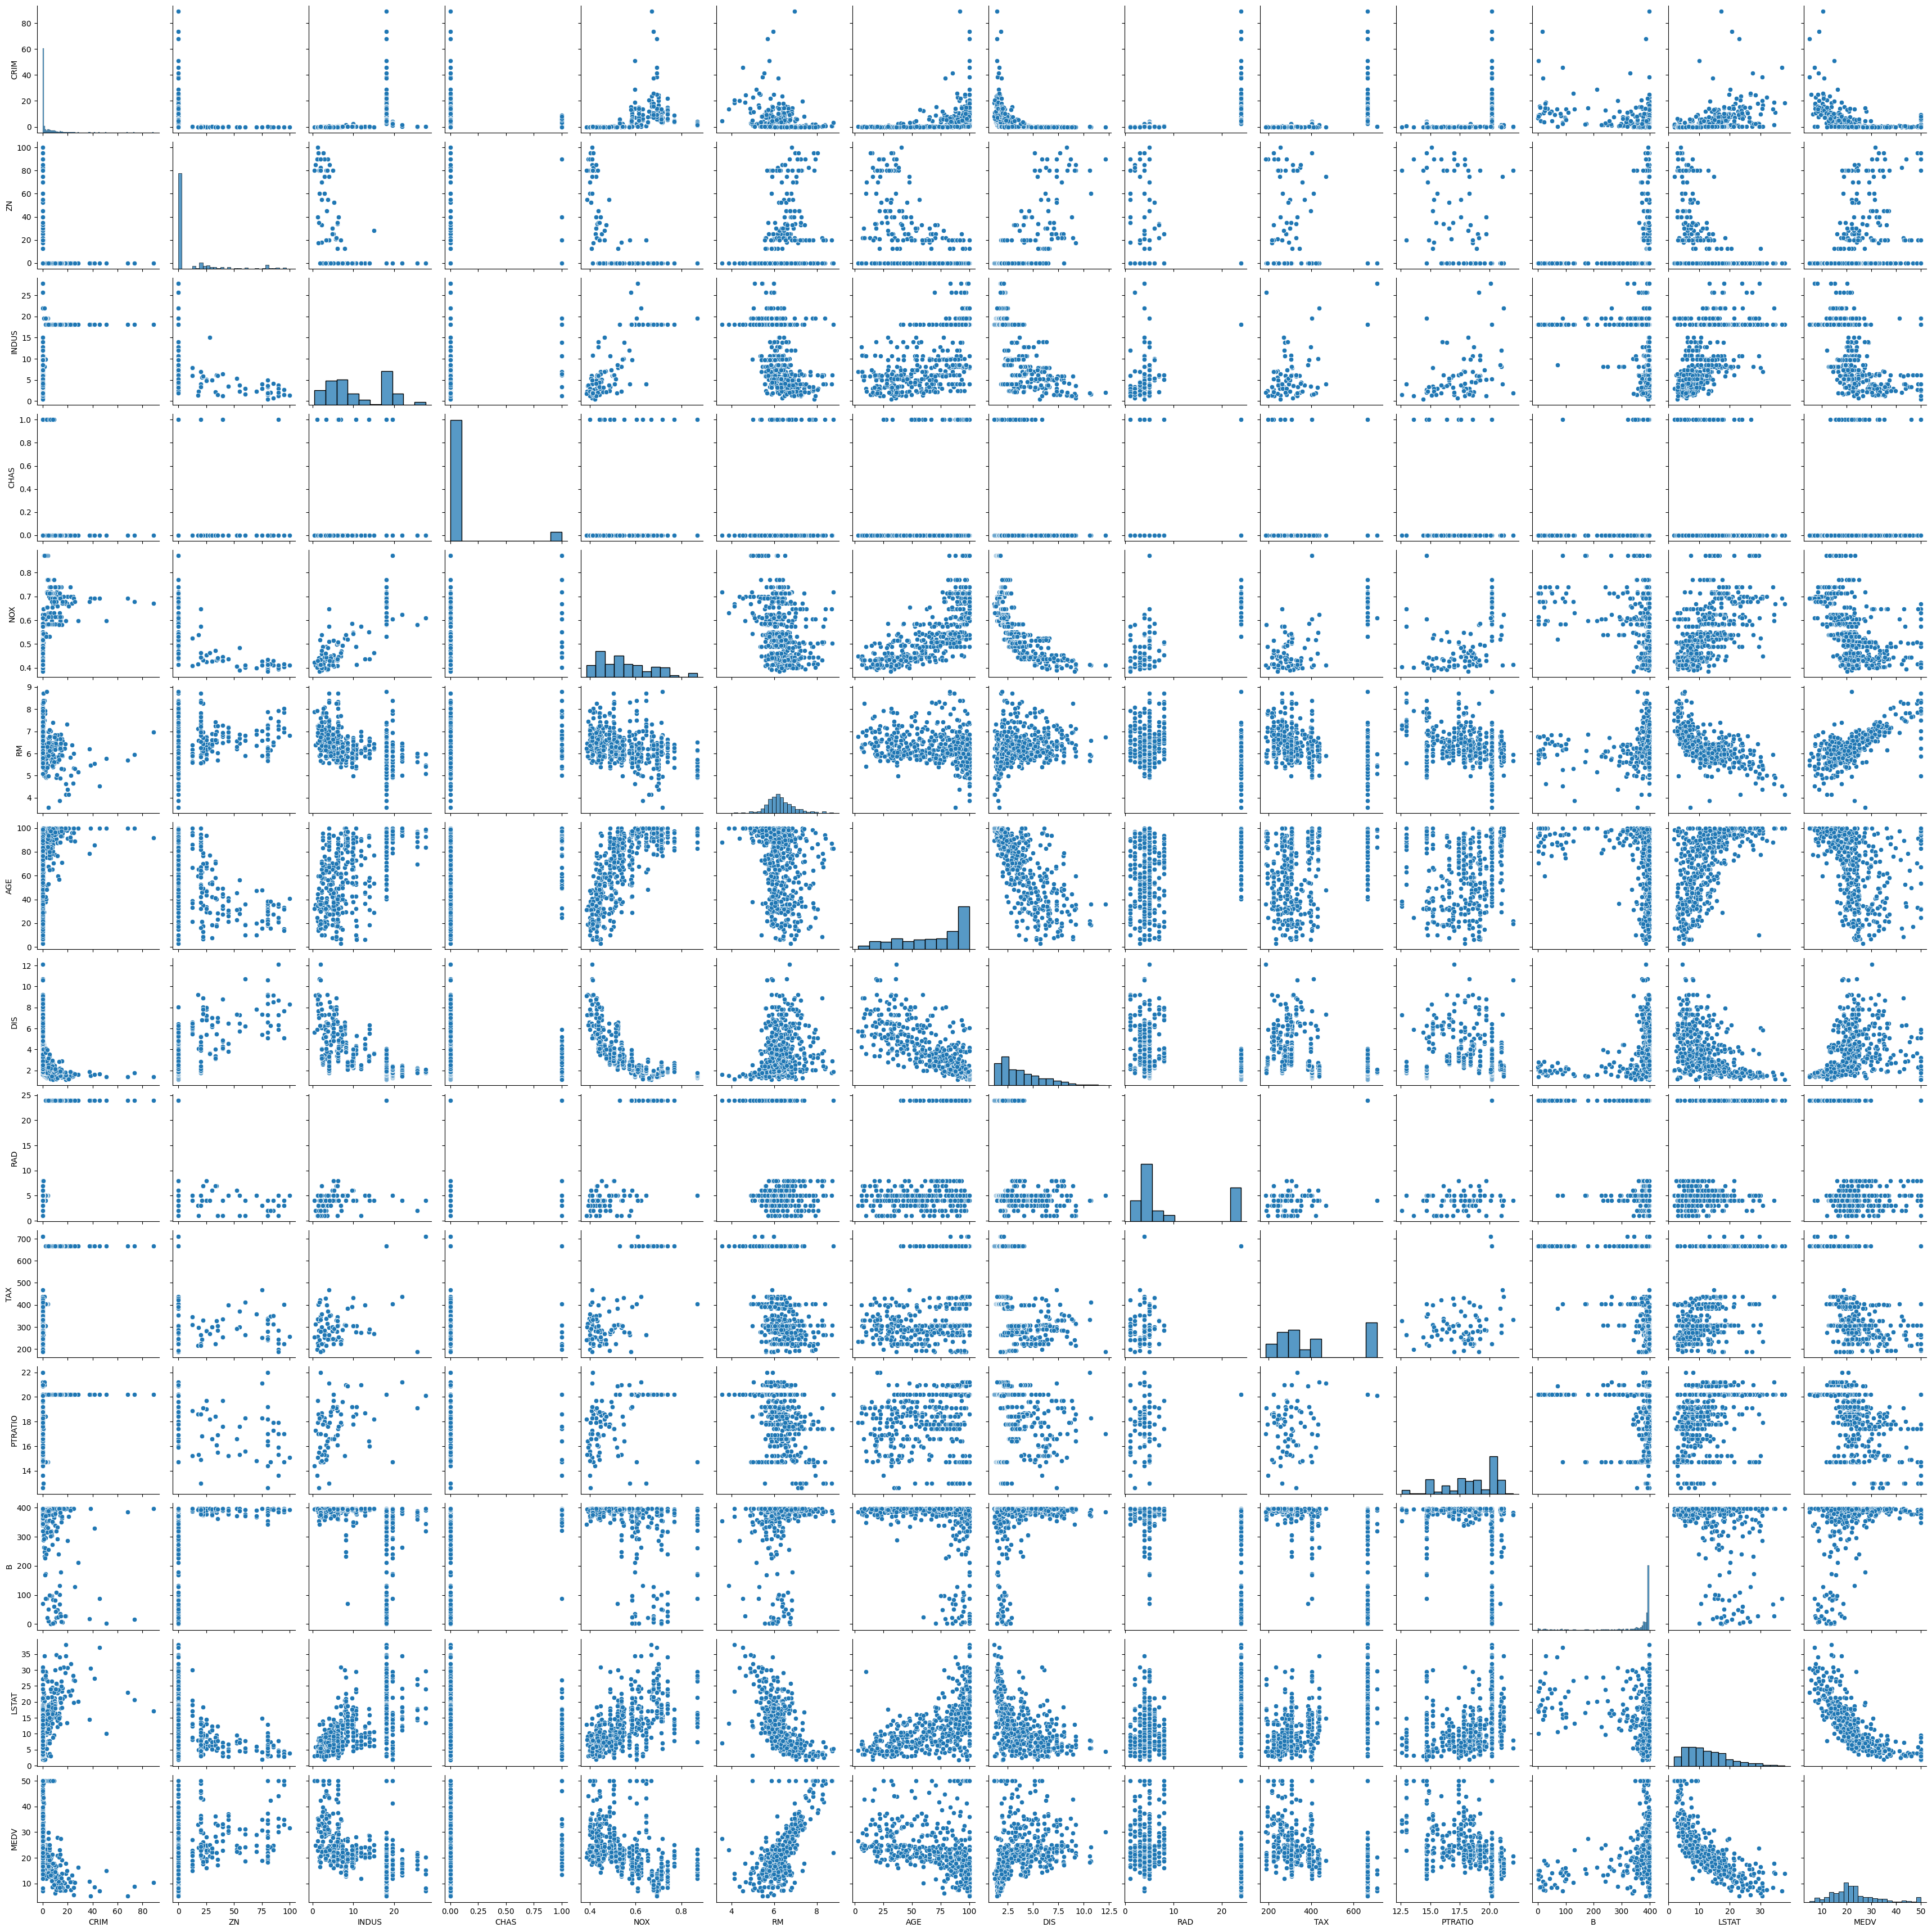

In [11]:
sbn.pairplot(data=df)

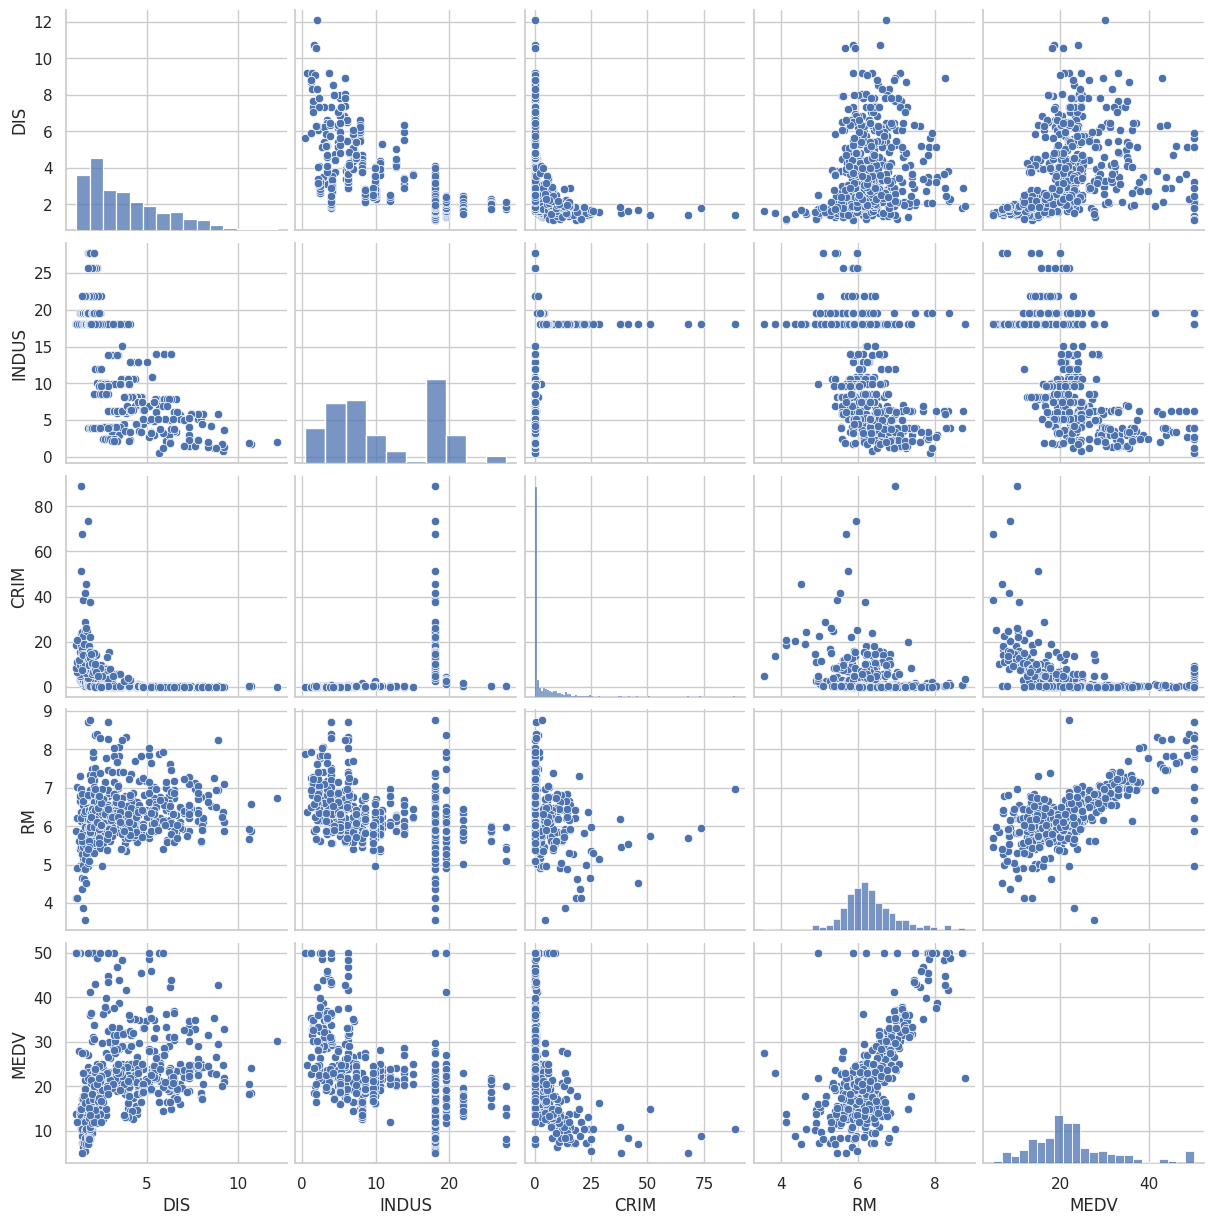

In [25]:
sbn.set(style="whitegrid",context="notebook")
cols=["DIS","INDUS","CRIM","RM","MEDV"]
sbn.pairplot(data=df[cols])

<Axes: >

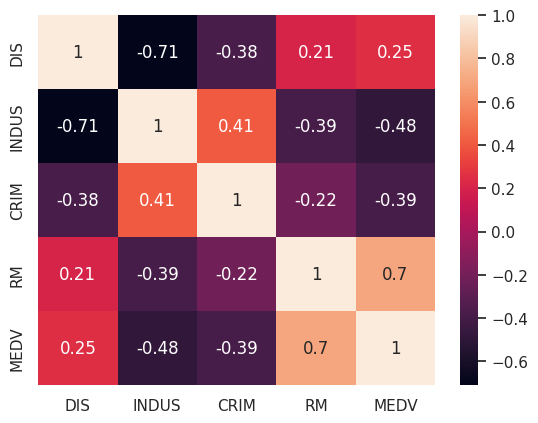

In [29]:
sbn.heatmap(df[cols].corr(),annot=True,cbar=True)

###Comienzo el tratamiento con sklearn

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

###Selecciono mis valores a utilizar

In [58]:
x=df["RM"].values.reshape(-1,1)
y=df["MEDV"].values.reshape(-1,1)
x_mean=df.RM.mean()
x_std=df.RM.std()
y_mean=df.MEDV.mean()
y_std=df.MEDV.std()

In [63]:
x_esc=StandardScaler()
y_esc=StandardScaler()

x=x_esc.fit_transform(x)
y=y_esc.fit_transform(y)

slr=LinearRegression()
slr.fit(x,y)

LinearRegression()

Text(0.5, 0, 'Media de numero de habitaciones')

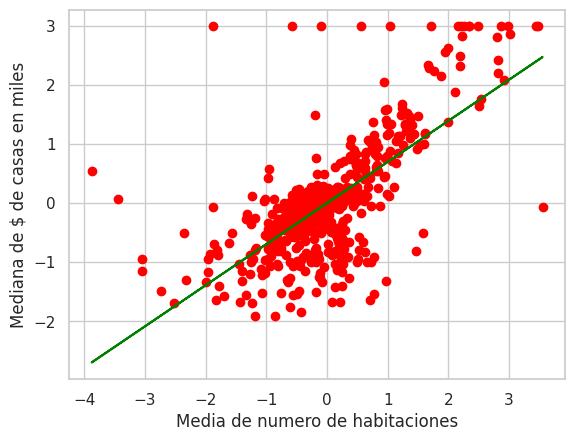

In [64]:
plt.scatter(x,y, color="red")
plt.plot(x,slr.predict(x), color="green")
plt.ylabel("Mediana de $ de casas en miles")
plt.xlabel("Media de numero de habitaciones")

###Acá hallo los valores sin el escalamiento

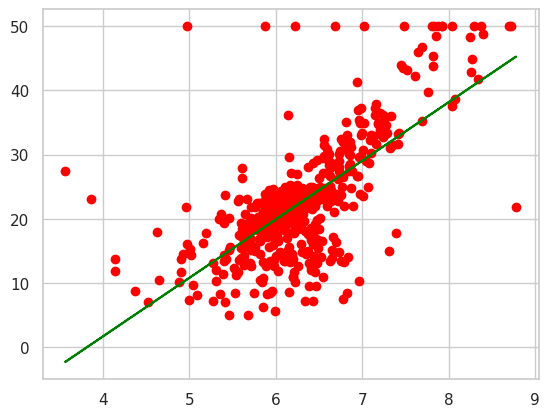

In [81]:
plt.scatter(df.RM.values.reshape(-1,1),df.MEDV.values.reshape(-1,1), color="red")
plt.plot(df.RM.values.reshape(-1,1),y_esc.inverse_transform(slr.predict(x_esc.fit_transform(df.RM.values.reshape(-1,1)))), color="green")

###Calculo el error MSE

In [83]:
from sklearn.metrics import mean_squared_error

In [84]:
mean_squared_error(df.MEDV.values.reshape(-1,1),y_esc.inverse_transform(slr.predict(x_esc.fit_transform(df.RM.values.reshape(-1,1)))))

43.60055177116957